(20, 11)
                Attribute Mercury  Venus  Earth   Moon   Mars Jupiter  Saturn  \
0          Mass (10^24kg)   0.330   4.87   5.97  0.073  0.642    1898     568   
1           Diameter (km)    4879  12104  12756   3475   6792  142984  120536   
2        Density (kg/m^3)    5429   5243   5514   3340   3934    1326     687   
3         Gravity (m/s^2)     3.7    8.9    9.8    1.6    3.7    23.1     9.0   
4  Escape Velocity (km/s)     4.3   10.4   11.2    2.4    5.0    59.5    35.5   

  Uranus Neptune   Pluto  
0   86.8     102  0.0130  
1  51118   49528    2376  
2   1270    1638    1850  
3    8.7    11.0     0.7  
4   21.3    23.5     1.3  
                  Attribute Mercury Venus Earth Moon  Mars  Jupiter   Saturn  \
15     Mean Temperature (C)     167   464    15  -20   -65     -110     -140   
16  Surface Pressure (bars)       0    92     1    0  0.01  Unknown  Unknown   
17          Number of Moons       0     0     1    0     2       95      274   
18             Ring Sy

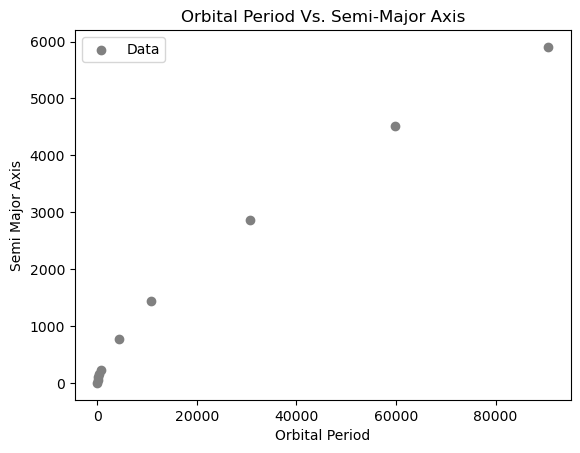

Fitted m: 0.00


In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

df = pd.read_csv("../../course_assignments/homework9/solar_system.csv")

print(df.shape) # The shape of the following data set is 20x11
# Within the data set, there are 20 rows and 11 columns, although there is technically an extra column as the start of the data set that holds the index number for each row.
print(df.head())
print(df.tail())
print(df.columns)
row_names = df["Attribute"].tolist()
print(row_names)

Orb = df.iloc[10, 1:].astype(float)
Per = df.iloc[8, 1:].astype(float)
Aph = df.iloc[9, 1:].astype(float)

print(Orb)
print(Per)
print(Aph)

# Perihelion: The point in an object's orbit where it is closest in distance to the object it is orbiting.
# Aphelion: The point in an object's orbit in which it is farthest away in distance from the object it is orbiting.
# Semi-Major Axis: The average between the perihelion and the aphelion of an object's orbit, or the mean in between the farthest and shortest distances in an orbit.


semi_major_axis = (Per + Aph) / 2

new_row = {'Attribute': 'semi_major_axis'}

for col, value in semi_major_axis.items():
    new_row[col] = value

df = pd.concat([df, pd.DataFrame([new_row])], ignore_index = True)

print(df.shape)
# The shape of the new data set is 21 x 11. It includes 21 rows and 11 columns.

plt.scatter(Orb, semi_major_axis, color = 'grey', label = "Data")
plt.xlabel("Orbital Period")
plt.ylabel("Semi Major Axis")
plt.title("Orbital Period Vs. Semi-Major Axis")
plt.legend()
plt.show()

def keplers_third_law(a, m):
    return m * a ** 1.5


popt, pcov = curve_fit(keplers_third_law,xdata = Orb, ydata = semi_major_axis)
M_fit = popt[0]

print(f"Fitted m: {M_fit:.2f}")

